<center><h1>Étude de santé publique

## Importation de librairies

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt


## Lecture de données

In [2]:
aide= pd.read_csv('aide_alimentaire.csv', sep=',')
population= pd.read_csv('population.csv', sep=',')
dispo= pd.read_csv('dispo_alimentaire.csv', sep=',')
sous_nutri= pd.read_csv('sous_nutrition.csv', sep=',')

## Nettoyage et preparation de données 

#### Remplacer les NA par 0

In [3]:
dispo.fillna(0, inplace = True)

#### Supprimer les valeurs du tableau dispo où l'alimentation humaine est negative

In [4]:
dispo.drop(dispo[ (dispo['Nourriture'] < 0) | (dispo['Disponibilité intérieure'] <0) ].index, inplace = True )

In [5]:
dispo.columns= ['Pays', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock']

#### Convertir le valeur de la population 

In [6]:
population["Valeur"]= population["Valeur"]*1000

In [7]:
population.columns = ["Pays", "Année", "Population"]

In [8]:
population.head()

,Pays,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


#### Supprimer les pays sans les personnes en sous_nutrition du tableau sous_nutrition

In [9]:
sous_nutri.dropna(inplace= True)

#### Remplacer les années 

In [10]:
sous_nutri.replace(to_replace=['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018', '2017-2019'], 
                       value =[2013, 2014, 2015, 2016, 2017, 2018], inplace=True)

In [11]:
sous_nutri.columns = [ "Pays", "Année_sn", "Population_sn"]

In [12]:
sous_nutri.head()

,Pays,Année_sn,Population_sn
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5


#### Suprimer les valeurs ambigues 

In [13]:
idx_pays = sous_nutri[sous_nutri['Population_sn'] =='<0.1'].index 
sous_nutri.drop(idx_pays, inplace=True)

#### Convertir en valeur numérique les valeurs de type 'objet'

In [14]:
sous_nutri['Population_sn'] = sous_nutri['Population_sn'].astype(float)

#### Convertir le nombre des personnes en sous-nutrition 

In [15]:
sous_nutri['Population_sn'] = sous_nutri['Population_sn']*1000000

## Demandes de Marc

### 1. La proportion de personnes en état de sous-nutrition 

In [16]:
#pop_2017= pop_17.pop_en_millions.sum()
pop_2017 =  population[population["Année"] == 2017].Population.sum()
print("Total de la population en 2017: ",pop_2017,"\n")

pop_sn_2017 = sous_nutri[sous_nutri["Année_sn"] == 2017].Population_sn.sum()
print("Population en sous nutrition en 2017: ",pop_sn_2017, "\n")

pourc_sn =  round(pop_sn_2017/pop_2017 *100,2)
print("Pourcentage de personnes en sous nutrition en 2017:" ,pourc_sn , "%")

Total de la population en 2017:  7548134111.0 

Population en sous nutrition en 2017:  535700000.0 

Pourcentage de personnes en sous nutrition en 2017: 7.1 %


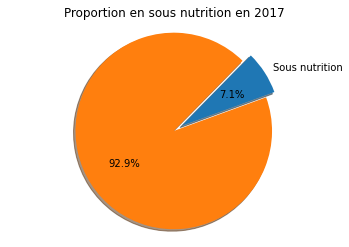

In [17]:
labels = 'Sous nutrition', ''
sizes = [7.1, 92.9]
explode = (0.1, 0)  # only "explode" the 1rst slice (i.e. 'sous nutrition')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=20)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion en sous nutrition en 2017')
plt.show()

### 2. Le nombre théorique de personnes qui pourraient être nourrie

In [18]:
dispo_pop = pd.merge(dispo, population[population["Année"] == 2017], how='left', on="Pays")

In [19]:
dispo_pop["total_cal"] = dispo_pop["Disponibilité alimentaire (Kcal/personne/jour)"] *365* dispo_pop.Population
total_calories = dispo_pop["total_cal"].sum()
print("Total de Kcal disponibles: ", total_calories, "\n")

total_per_nourries = round(total_calories/(2500*365),0)
print("Total de personnes qui pourraient être nourries: ", total_per_nourries, "\n")

print("Proportion :", "{:.2f}".format(total_per_nourries*100/population.loc[population['Année'] == 2017,"Population"].sum()), "%")

Total de Kcal disponibles:  7635904319657565.0 

Total de personnes qui pourraient être nourries:  8368114323.0 

Proportion : 110.86 %


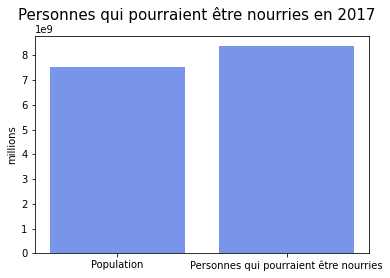

In [20]:
labels_nourries = 'Population', 'Personnes qui pourraient être nourries'
valeurs = [ pop_2017, total_per_nourries]

plt.bar(labels_nourries, valeurs, color='royalblue', alpha=0.7)
plt.suptitle('Personnes qui pourraient être nourries en 2017',fontsize=15)
plt.ylabel('millions')
plt.show()

### 3. Idem pour la disponibilité alimentaire des produits végétaux

In [21]:
kcal_vegetaux = dispo_pop[dispo_pop["Origine"]== "vegetale"].total_cal.sum()
print('Total de kcal de produits végétaux: ', kcal_vegetaux, "\n")

total_per_nourries_veg = round(kcal_vegetaux/(2500*365),0)
print("Total de personnes qui pourraient être nourries: ", total_per_nourries_veg,"\n")

print("Proportion :", "{:.2f}".format(total_per_nourries_veg*100/population.loc[population['Année'] == 2017,"Population"].sum()), "%")

Total de kcal de produits végétaux:  6300756229742880.0 

Total de personnes qui pourraient être nourries:  6904938334.0 

Proportion : 91.48 %


### 4. L’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.

In [22]:
dispo_inter = dispo["Disponibilité intérieure"].sum()

In [23]:
prop_animal = dispo['Aliments pour animaux'].sum()*100/dispo_inter
print("Proportion d'Aliments pour animaux: ", round(prop_animal,2) ,"%\n")

prop_pertes = dispo["Pertes"].sum()*100/dispo_inter
print("Proportion de Pertes: ", round(prop_pertes,2) ,"%\n")

prop_nourriture = dispo["Nourriture"].sum()*100/dispo_inter
print("Proportion pour l'utilisation humaine: ", round(prop_nourriture,2) ,"%\n")

Proportion d'Aliments pour animaux:  13.23 %

Proportion de Pertes:  4.6 %

Proportion pour l'utilisation humaine:  49.48 %



## Demandes  de Mélanie

### 1. Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [24]:
sous_nutri_pop= pd.merge( sous_nutri[sous_nutri["Année_sn"] == 2017], population[population["Année"] == 2017], how = 'left', on = 'Pays' )

In [25]:
sous_nutri_pop["pourc_sn"] = round(sous_nutri_pop["Population_sn"] / sous_nutri_pop["Population"]*100,2)

In [26]:
dix_pays_sn = sous_nutri_pop.sort_values(by =['pourc_sn'], ascending= False).head(10)
dix_pays_sn.reset_index(drop=True, inplace=True)
dix_pays_sn[["Pays","pourc_sn"]]

,Pays,pourc_sn
0,Haïti,48.26
1,République populaire démocratique de Corée,47.19
2,Madagascar,41.06
3,Libéria,38.28
4,Lesotho,38.25
5,Tchad,37.96
6,Rwanda,35.06
7,Mozambique,32.81
8,Timor-Leste,32.17
9,Afghanistan,28.93


<ipython-input-27-452b4a353c42>:16: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),


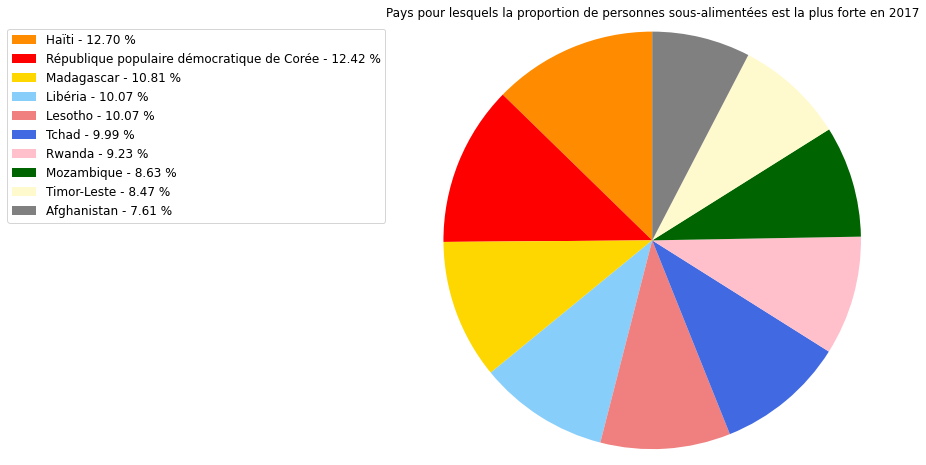

In [27]:
plt.figure(figsize=(12,8))
x = dix_pays_sn.Pays
y = dix_pays_sn["pourc_sn"]
colors = ['darkorange','red','gold','lightskyblue','lightcoral','royalblue', 'pink', 'darkgreen','lemonchiffon','grey','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("Pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017")
plt.show()

### 2. Ceux qui ont le plus bénéficié d’aide depuis 2013

In [28]:
plus_beneficie = round( aide.groupby( by = ['Pays bénéficiaire'] ).mean(),0)

In [29]:
dix_plus_benef = plus_beneficie.sort_values(by =['Valeur'], ascending= False).head(10)

In [30]:
pays_pb=dix_plus_benef.index
res_plus_benef= DataFrame({'Pays': pays_pb,  'Valeur': dix_plus_benef['Valeur'].values})
res_plus_benef

,Pays,Valeur
0,République arabe syrienne,48920.0
1,Éthiopie,41857.0
2,Yémen,31750.0
3,Soudan du Sud,31602.0
4,Soudan,27908.0
5,Kenya,20475.0
6,Bangladesh,13928.0
7,Pakistan,12162.0
8,Afghanistan,11591.0
9,République démocratique du Congo,11540.0


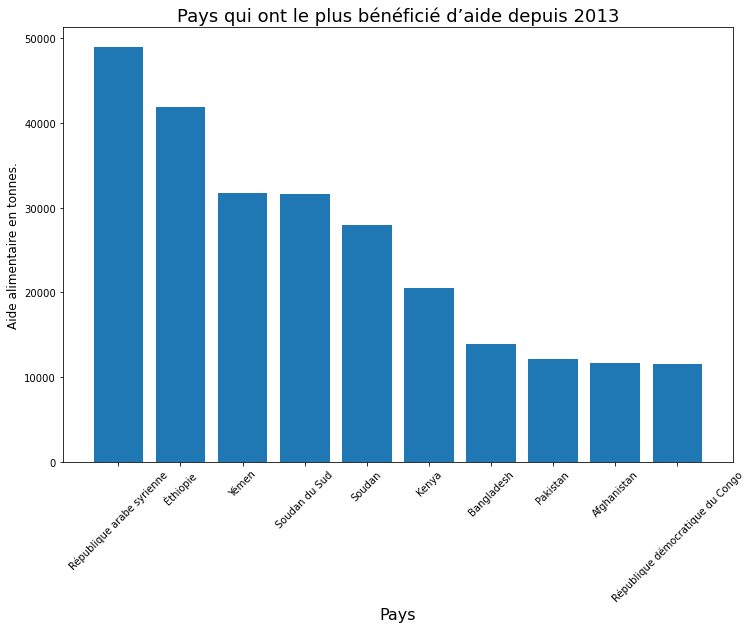

In [31]:
plt.figure(figsize=(12,8))
plt.bar(res_plus_benef['Pays'],res_plus_benef['Valeur'],align='center') # A bar chart
plt.title('Pays qui ont le plus bénéficié d’aide depuis 2013', fontsize=18)
plt.xlabel('Pays',fontsize=16)
plt.ylabel('Aide alimentaire en tonnes.', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 3.1 Pays ayant le plus de disponibilité/habitant

In [32]:
dispo_pays = dispo.groupby(by = ['Pays']).sum()

In [33]:
pays_plus_dispo = dispo_pays.sort_values(by=['Disponibilité alimentaire (Kcal/personne/jour)'], ascending= False).head(10)

In [34]:
pays_pd=pays_plus_dispo.index
res_plus_dispo= DataFrame({'Pays': pays_pd,  'Disponibilité alimentaire': pays_plus_dispo['Disponibilité alimentaire (Kcal/personne/jour)'].values})
res_plus_dispo

,Pays,Disponibilité alimentaire
0,Autriche,3770.0
1,Belgique,3737.0
2,Turquie,3707.0
3,États-Unis d'Amérique,3682.0
4,Israël,3593.0
5,Italie,3578.0
6,Irlande,3543.0
7,Luxembourg,3537.0
8,Égypte,3518.0
9,Allemagne,3503.0


### 3.2 Pays ayant le moins de disponibilité/habitant

In [35]:
pays_moins_dispo= dispo_pays.sort_values(by= ['Disponibilité alimentaire (Kcal/personne/jour)'], ascending= True).head(10)

In [36]:
pays_md = pays_moins_dispo.index
res_moins_dispo= DataFrame({'Pays': pays_md,  'Disponibilité alimentaire': pays_moins_dispo['Disponibilité alimentaire (Kcal/personne/jour)'].values})
res_moins_dispo

,Pays,Disponibilité alimentaire
0,République centrafricaine,1879.0
1,Zambie,1924.0
2,Madagascar,2056.0
3,Afghanistan,2087.0
4,Haïti,2089.0
5,République populaire démocratique de Corée,2093.0
6,Tchad,2109.0
7,Zimbabwe,2113.0
8,Ouganda,2126.0
9,Timor-Leste,2129.0


## Demandes de Julien

### 1. L’utilisation des céréales, notamment la répartition entre l’alimentation humaine et l’alimentation pour animaux

In [37]:
cereales= ['Blé','Céréales, Autres','Orge','Maïs','Millet','Riz (Eq Blanchi)','Avoine','Soja','Sorgho']

In [38]:
dispo_cereales = dispo[dispo["Produit"].isin(cereales)]

In [39]:
print("Utilisation de céréales pour l'alimentation humaine: ",dispo_cereales["Nourriture"].sum()*1000, " tonnes\n")

print("Utilisation de céréales pour animaux: ",dispo_cereales["Aliments pour animaux"].sum()*1000, " tonnes\n")

print("Proportion de céréales pour animaux:", round(dispo_cereales["Aliments pour animaux"].sum()/dispo_cereales["Nourriture"].sum()*100,2), " %")

Utilisation de céréales pour l'alimentation humaine:  1034385000.0  tonnes

Utilisation de céréales pour animaux:  882843000.0  tonnes

Proportion de céréales pour animaux: 85.35  %


### 2. Utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition

In [40]:
dispo_thailand = dispo.loc[( (dispo["Pays"]== "Thaïlande") & (dispo["Produit"] == "Manioc") )]     

In [41]:
pourc_manioc_export = dispo_thailand["Exportations - Quantité"].values/dispo_thailand["Production"].values*100
print("Pourcentage d'exportation du manioc:", round(pourc_manioc_export[0],2), "%\n")

thailand_sn = sous_nutri_pop.loc[(sous_nutri_pop["Pays"] == 'Thaïlande') ]
print("Pourcentage en sous nutrition en Thaïlande: ",thailand_sn["pourc_sn"].iloc[0], "%")


Pourcentage d'exportation du manioc: 83.41 %

Pourcentage en sous nutrition en Thaïlande:  8.96 %
